In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile, os
import shutil

C:\Users\MoKha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\MoKha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data_dir = 'E:\\Kuliah\\UPI\\SEMESTER 8\\dataset skripsi\\dataset ruang kelas klasifikasi'

class_map = {
    'Angry': 0,
    'Disgust': 1,
    'Fear': 2,
    'Happy': 3,
    'Sad': 4,
    'Surprise': 5,
    'Neutral': 6,
}

In [3]:
image_data = []
labels = []

# Loop untuk setiap folder (kelas)
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)

    # Pastikan folder yang diambil adalah folder valid (bukan file atau lainnya)
    if os.path.isdir(class_path):
        label = class_map[class_folder]  # Ambil label sesuai map kelas

        # Loop untuk setiap gambar dalam folder kelas tersebut
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Load gambar dengan OpenCV dalam bentuk grayscale
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Pastikan gambar terbaca dengan benar
            if image is not None:
                # Resize gambar ke ukuran tetap jika diperlukan, misalnya 48x48
                image = cv2.resize(image, (48, 48))

                # Flatten gambar menjadi 1D array dan ubah ke string terpisah dengan spasi
                image_flat = ' '.join(map(str, image.flatten()))

                # Simpan gambar dan labelnya
                image_data.append(image_flat)
                labels.append(label)

In [4]:
df = pd.DataFrame({
    'pixels': image_data,
    'emotion': labels,
})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pixels   3195 non-null   object
 1   emotion  3195 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.0+ KB


In [6]:
df.isnull().sum()

pixels     0
emotion    0
dtype: int64

In [7]:
duplicate_count = df.duplicated(subset='pixels').sum()

print(f"Number of duplicate rows': {duplicate_count}")

Number of duplicate rows': 0


In [8]:
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = df['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Neutral,740
1,Happy,707
2,Surprise,498
3,Angry,484
4,Sad,413
5,Disgust,184
6,Fear,169


C:\Users\MoKha\AppData\Local\Temp\ipykernel_30716\1757753416.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)


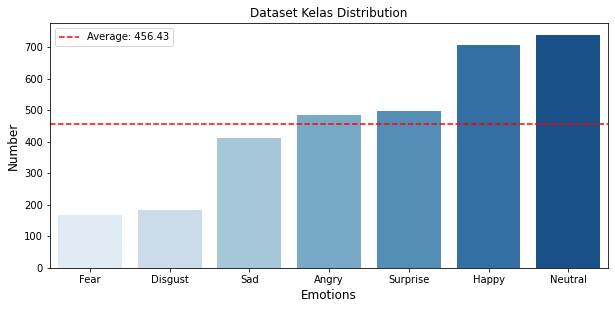

In [9]:
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Calculate the average count
average_count = emotion_counts['number'].mean()

# Define colors and plot
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('Dataset Kelas Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)

# Add a horizontal line for the average
plt.axhline(average_count, color='red', linestyle='--', linewidth=1.5, label=f'Average: {average_count:.2f}')

# Add a legend to display the average line label
plt.legend()

plt.show()

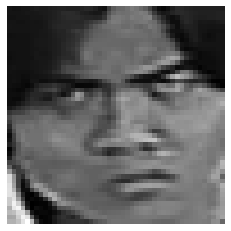

In [15]:
def string_to_image(pixels_string):
    pixels = np.array(pixels_string.split(), dtype=np.uint8)
    image = pixels.reshape(48, 48)
    return image

pixels_string = df.iloc[1]['pixels']
image = string_to_image(pixels_string)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [11]:
df.to_csv('E:\\Kuliah\\UPI\\SEMESTER 8\\dataset skripsi\\student.csv', index=False)